# Clasificador de SPAM

Este es un clasificador de SPAM que utliza Multinomial Naive Bayes

## Obtencion de los datos

Utilizaremos el siguiente dataset de kaggle: https://www.kaggle.com/datasets/uciml/sms-spam-collection-dataset

In [83]:
import re

import matplotlib.pyplot as plt
import nltk
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import (ConfusionMatrixDisplay, accuracy_score,
                             classification_report)
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB

## Limpieza

Primero se cambio a .xlsx 

In [84]:
df = pd.read_excel('../data/raw/spam.xlsx')

El dataset es simple, contiene una columna donde te dice si es *spam* o si es *ham*, y otra donde esta el mensaje

In [85]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [86]:
df = df.drop(columns = ['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'])

In [87]:
df = df.rename(columns = {'v2':'text','v1':'class'})

In [88]:
df.dtypes

class    object
text     object
dtype: object

Convertimos el texto a minusculas

In [89]:
df['text'] = df['text'].apply(lambda x: str(x).lower())

Quitamos la â que por alguna razon aparece mucho

In [90]:
REGEX = re.compile('â')

In [91]:
df['text'] = df['text'].apply(lambda x: re.sub(REGEX,' ',x))

In [92]:
df.head()

,class,text
0,ham,"go until jurong point, crazy.. available only ..."
1,ham,ok lar... joking wif u oni...
2,spam,free entry in 2 a wkly comp to win fa cup fina...
3,ham,u dun say so early hor... u c already then say...
4,ham,"nah i don't think he goes to usf, he lives aro..."


## Exploracion 

### Distribucion de los datos

In [11]:
import seaborn as sns
import matplotlib.pyplot as plt

In [12]:
df.count()

class    5572
text     5572
dtype: int64

<AxesSubplot:xlabel='class'>

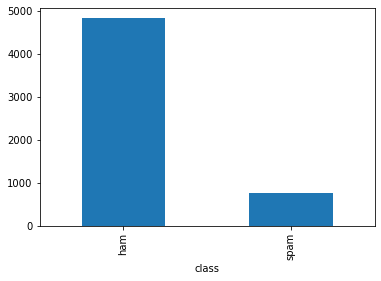

In [13]:
df.groupby(['class']).size().plot(kind='bar')

Dado que hay muchos mensajes normales y pocos son spam procedere a igualar las clases

In [14]:
spam = df[df['class']=='spam']

In [60]:
spam.sample().values

array([['spam',
        'urgent! we are trying to contact u. todays draw shows that you have won a  £800 prize guaranteed. call 09050003091 from land line. claim c52. valid12hrs only']],
      dtype=object)

In [15]:
spam.shape

(747, 2)

In [16]:
ham = df[df['class']=='ham'].sample(747)

In [17]:
ham.shape

(747, 2)

In [18]:
df_balanceado = pd.concat([ham,spam])
df_balanceado

,class,text
2702,ham,"omw back to tampa from west palm, you hear wha..."
466,ham,they don't put that stuff on the roads to keep...
2183,ham,"chinatown got porridge, claypot rice, yam cake..."
4036,ham,dont flatter yourself... tell that man of mine...
4243,ham,"aight, i'm chillin in a friend's room so text ..."
...,...,...
5537,spam,want explicit sex in 30 secs? ring 02073162414...
5540,spam,asked 3mobile if 0870 chatlines inclu in free ...
5547,spam,had your contract mobile 11 mnths? latest moto...
5566,spam,reminder from o2: to get 2.50 pounds free call...


<AxesSubplot:xlabel='class'>

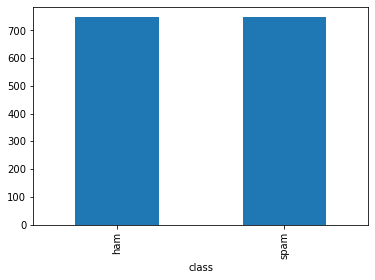

In [19]:
df_balanceado.groupby(['class']).size().plot(kind='bar')

In [20]:
df = df_balanceado
df

,class,text
2702,ham,"omw back to tampa from west palm, you hear wha..."
466,ham,they don't put that stuff on the roads to keep...
2183,ham,"chinatown got porridge, claypot rice, yam cake..."
4036,ham,dont flatter yourself... tell that man of mine...
4243,ham,"aight, i'm chillin in a friend's room so text ..."
...,...,...
5537,spam,want explicit sex in 30 secs? ring 02073162414...
5540,spam,asked 3mobile if 0870 chatlines inclu in free ...
5547,spam,had your contract mobile 11 mnths? latest moto...
5566,spam,reminder from o2: to get 2.50 pounds free call...


### Palabras mas comunes en mensajes de SPAM

In [21]:
from wordcloud import WordCloud

In [22]:
spam_words = ' '.join(df['text'][df['class']=='spam'])
spam_wc = WordCloud(width=512,height=512).generate(spam_words)

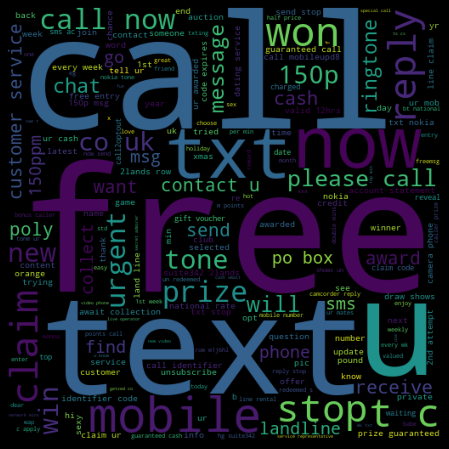

In [23]:
plt.figure(figsize= (10,8),facecolor= 'k')
plt.axis('off')
plt.imshow(spam_wc)
plt.show()

## Palabras mas comunes en mensajes normales

In [24]:
ham_words = ' '.join(df['text'][df['class']=='ham'])
ham_wc = WordCloud(width=512,height=512).generate(ham_words)

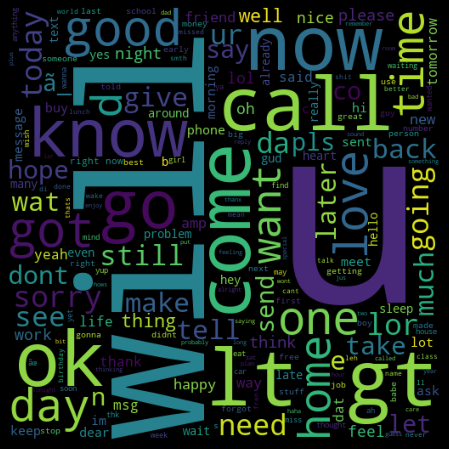

In [25]:
plt.figure(figsize= (10,8),facecolor= 'k')
plt.axis('off')
plt.imshow(ham_wc)
plt.show()

# Creacion del modelo

In [93]:
X = df['text']
y = df['class']

In [94]:
cv = CountVectorizer()
X_vec = cv.fit_transform(X)

In [95]:
X_train, X_test, y_train, y_test = train_test_split(
    X_vec, y, test_size=0.30)

In [96]:
clf = MultinomialNB()
clf.fit(X_train, y_train)

MultinomialNB()

In [97]:
ypred = clf.predict(X_test)

In [98]:
print(f"Accuracy score: {accuracy_score(y_test,ypred):.2f}")

Accuracy score: 0.98


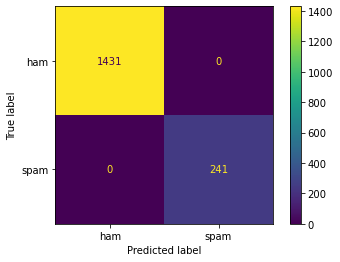

In [99]:
ConfusionMatrixDisplay.from_estimator(clf, X_test, ypred)

In [100]:
print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

         ham       0.99      0.98      0.99      1446
        spam       0.90      0.96      0.93       226

    accuracy                           0.98      1672
   macro avg       0.94      0.97      0.96      1672
weighted avg       0.98      0.98      0.98      1672



In [101]:
X_test

<1672x8632 sparse matrix of type '<class 'numpy.int64'>'
	with 22382 stored elements in Compressed Sparse Row format>

In [111]:
new_mail = ["urgent! we are trying to contact u. todays draw shows that you have won a  £800 prize guaranteed. call 09050003091 from land line. claim c52. valid12hrs only"]

In [1]:
new_mail = cv.transform(new_mail)

NameError: name 'cv' is not defined

In [113]:
new_mail.resize((449,8632))

In [114]:
clf.predict(new_mail)

array(['spam', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham', 'ham',
       'ham', 'ham'